In [ ]:
"""
test_yank_afep.py

"""
import os
import sys
sys.path.append("..")


from yank_afep_analyzer import YankAtomEnergyAnalyzer
print("import successful")
analyzer = YankAtomEnergyAnalyzer(nc_path=os.path.abspath('../data/phenol/solvent1.nc'),
        nc_checkpoint_path=os.path.abspath('../data/phenol/solvent1_checkpoint.nc'))
print("initialize successful")

In [ ]:
# analyze the energy from the first checkpoint
position = analyzer.read_positions(0)
print(analyzer._analyze_atom_energies_in_simulation_with_positions(position))


In [28]:
n_checkpoints = len(analyzer.checkpoint_schedule)
print(n_checkpoints)

200


In [29]:
energies = []
for idx in range(n_checkpoints):
    position = analyzer.read_positions(idx)
    energies.append(analyzer._analyze_atom_energies_in_simulation_with_positions(position))
    
    

In [38]:
schedule = analyzer._checkpoint_lambda_electrostatics_schedule
schedule_mask = np.array([_lambda > 0.0 for _lambda in schedule])
selected_schedule = np.array(schedule)[schedule_mask]
print(selected_schedule)


[1.   1.   0.25 0.5  0.25 0.75 0.75 0.75 0.25 0.5  0.75 1.   0.5  1.
 1.   0.75 0.5  0.5  0.75 0.25 0.5  0.25 0.75 0.25 0.75 0.5  0.75 1.
 1.   0.25 0.5  1.   0.5  0.25 0.5  1.   1.   0.5  0.25 0.75]


In [31]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
energies = np.array(energies)
print(energies.shape)



(200, 13, 4)


In [32]:
selected_energies = energies[schedule_mask]




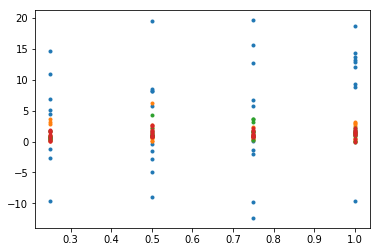

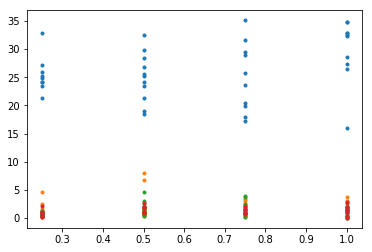

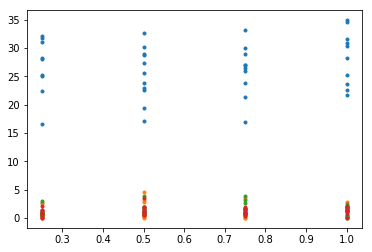

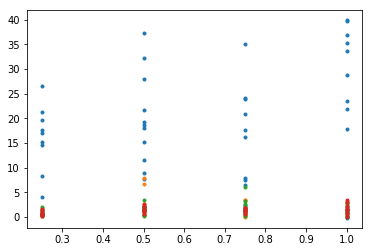

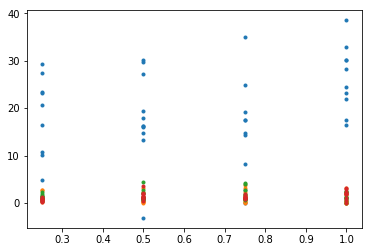

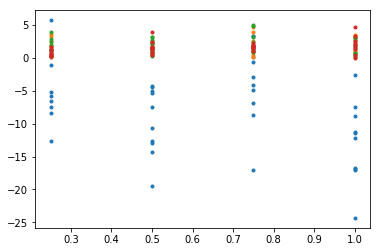

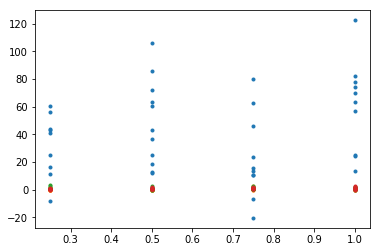

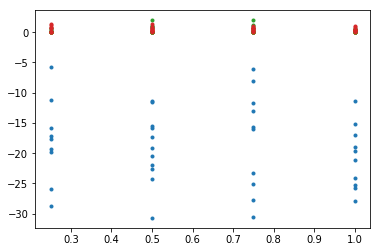

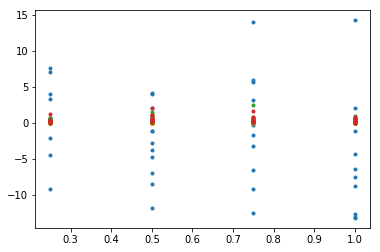

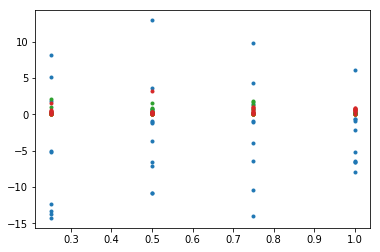

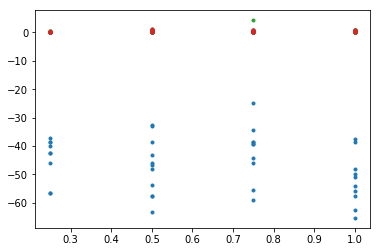

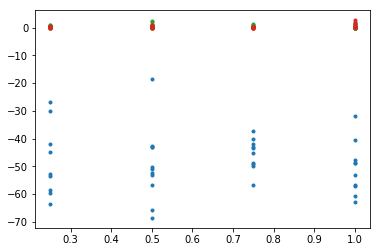

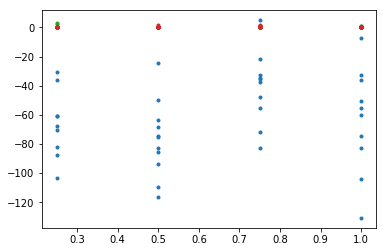

In [40]:
for atom_idx in range(selected_energies.shape[1]):
    plt.clf()
    for force_idx in range(selected_energies.shape[2]):
        plt.plot(selected_schedule, selected_energies[:, atom_idx, force_idx], '.')
    plt.show()


In [ ]:
plt.show()